In [1]:
!pip3 install nibabel

  Obtaining dependency information for nibabel from https://files.pythonhosted.org/packages/c9/23/8a8cfdc318231f369a13b7d3b5ebc9d67fc9314d62056efdafb371953020/nibabel-5.2.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 6.5 MB/s eta 0:00:0000:0100:01


In [1]:
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [7]:
scanFilePath = '1-Flair.nii'

scan = nib.load(scanFilePath)
scanArray = scan.get_fdata()

In [8]:
scanArrayShape = scanArray.shape
print('The scan data array has the shape: ', scanArrayShape)

The scan data array has the shape:  (256, 256, 23)


In [9]:
scanHeader = scan.header
print('The scan header is as follows: \n', scanHeader)

The scan header is as follows: 
 <class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b'          '
db_name         : b'                  '
extents         : 16384
session_error   : 0
regular         : b'r'
dim_info        : 32
dim             : [  3 256 256  23   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float64
bitpix          : 64
slice_start     : 0
pixdim          : [1. 1. 1. 1. 0. 0. 0. 0.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 0
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'                                                                                '
aux_file        : b'                        '
qform_code      : unknown
sform_code      : unknown
quatern_b       

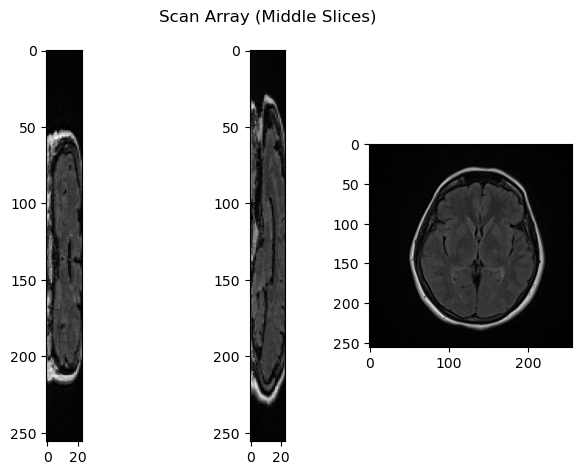

In [11]:
fig, axs = plt.subplots(1,3)
fig.suptitle('Scan Array (Middle Slices)')
axs[0].imshow(scanArray[scanArrayShape[0]//2,:,:], cmap='gray')
axs[1].imshow(scanArray[:,scanArrayShape[1]//2,:], cmap='gray')
axs[2].imshow(scanArray[:,:,scanArrayShape[2]//2], cmap='gray')
fig.tight_layout()
plt.show()

In [12]:
pixDim = scanHeader['pixdim'][1:4]
aspectRatios = [pixDim[1]/pixDim[2],pixDim[0]/pixDim[2],pixDim[0]/pixDim[1]]
print('The required aspect ratios are: ', aspectRatios)

The required aspect ratios are:  [1.0, 1.0, 1.0]


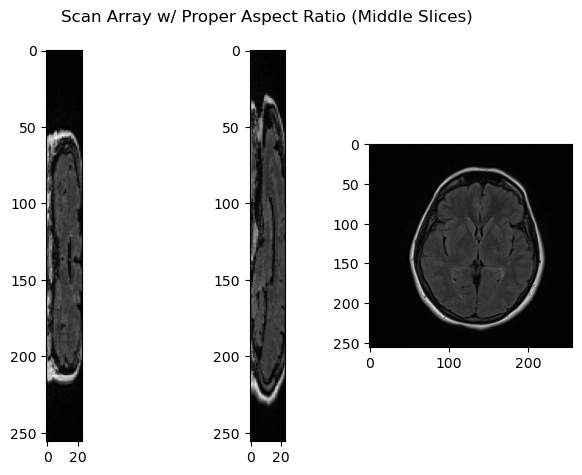

In [13]:
fig, axs = plt.subplots(1,3)
fig.suptitle('Scan Array w/ Proper Aspect Ratio (Middle Slices)')
axs[0].imshow(scanArray[scanArrayShape[0]//2,:,:], aspect = aspectRatios[0], cmap='gray')
axs[1].imshow(scanArray[:,scanArrayShape[1]//2,:], aspect = aspectRatios[1], cmap='gray')
axs[2].imshow(scanArray[:,:,scanArrayShape[2]//2], aspect = aspectRatios[2], cmap='gray')
fig.tight_layout()
plt.show()

In [36]:
newScanDims = np.multiply(scanArrayShape, pixDim)
newScanDims = (round(newScanDims[0]),round(newScanDims[1]),round(newScanDims[2]))
print('The new scan dimensions are: ', newScanDims)

The new scan dimensions are:  (512, 512, 19)


In [38]:
outputPath = 'sample_test/'
 
#Iterate and save scan slices along 0th dimension
for i in range(scanArrayShape[0]):
    #Resample the slice
    outputArray = cv2.resize(scanArray[i,:,:], (newScanDims[2],newScanDims[1]))
    #Save the slice as .png image
    cv2.imwrite(outputPath+'test1'+str(i)+'.png', outputArray)

for i in range(scanArrayShape[1]):
    #Resample the slice
    outputArray = cv2.resize(scanArray[:,i,:], (newScanDims[2],newScanDims[0]))
    #Save the slice as .png image
    cv2.imwrite(outputPath+'test2'+str(i)+'.png', outputArray)

for i in range(scanArrayShape[2]):
    #Resample the slice
    outputArray = cv2.resize(scanArray[:,:,i], (newScanDims[1],newScanDims[0]))
    #Rotate slice clockwise 90 degrees
    outputArray = cv2.rotate(outputArray, cv2.ROTATE_90_CLOCKWISE)
    #Save the slice as .png image
    cv2.imwrite(outputPath+'test3'+str(i)+'.png', outputArray)